In [4]:
#Libraries
%matplotlib inline
import pandas as pd
from pandas import read_csv

import numpy as np
import matplotlib.pyplot as plt

#!pip install pydotplus
import pydotplus 

from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

In [5]:
#Read in data
X_train = read_csv("X_train.csv")
X_train

,Timestamp,Email Address,What is your first name?,What is your last name?,What is your age?,"Do you like online learning? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1, Depends = 2",How often do you procrastinate?,"If you need help with homework/studying, what do you go to first? (Choose the number that corresponds best with your answer:) Google/Internet = 0, Notes = 1, Textbook = 2, Friends/classmates = 3, Tutor = 4, Professor = 5, Family = 6","Do you use online study tools? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1",What kind of book would you like to read for fun?,...,"Of these three classes, which is your favorite?","When you hear a song on the radio, what are you most likely to do?",What do you find most distracting when in class?,What do you like to do to relax?,What is the best way for you to remember a friend's phone number?,"If you won a game, which of these three prizes would you choose?",Which would you rather go to with a group of friends?,What are you most likely to remember about new people you meet?,"When you give someone directions to your house, what are you most likely to tell them?",Learning Style
0,10/27/2021 12:23:17,NaN,Kim,Lam,21,2,3,0,1,3,...,3,2,3,2,3,3,3,1,1,3
1,10/28/2021 11:22:38,NaN,Adrian,Bahri,21,0,2,1,1,2,...,2,1,2,3,1,1,2,2,3,2
2,10/28/2021 11:25:36,NaN,Ellen,Forsgren,21,0,4,0,1,1,...,2,2,2,1,3,1,2,1,3,1
3,10/28/2021 11:30:02,NaN,Dylan,McCarroll,20,1,4,0,0,2,...,2,2,2,2,3,3,3,2,3,2
4,10/28/2021 11:33:42,NaN,Tanner,Foley,22,0,4,0,1,2,...,3,2,3,3,3,1,1,2,2,3
5,10/28/2021 12:16:53,NaN,Nathan,Buchanan,21,0,2,1,1,2,...,2,2,3,2,2,3,3,2,1,2
6,10/28/2021 13:52:33,NaN,Hunter,Vallad,21,1,4,0,1,2,...,2,3,3,1,3,1,3,2,2,3
7,10/28/2021 14:00:04,NaN,David,Pace,20,0,5,0,1,1,...,2,2,3,2,3,3,3,1,2,1
8,10/28/2021 14:03:09,NaN,Christopher,Enea,22,2,4,0,0,2,...,3,3,3,3,3,3,3,1,3,3
9,10/28/2021 14:03:21,NaN,Emilio,Arias,21,2,5,0,0,1,...,2,3,2,1,3,3,3,1,2,1


In [8]:
#Dropping columns not used in calculations
X_train.drop('Timestamp', inplace=True, axis=1) 
X_train.drop('Email Address', inplace=True, axis=1) 
X_train.drop('What is your first name?', inplace=True, axis=1) 
X_train.drop('What is your last name?', inplace=True, axis=1) 
X_train.drop('What is your age?', inplace=True, axis=1) 

In [9]:
X_train

,"Do you like online learning? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1, Depends = 2",How often do you procrastinate?,"If you need help with homework/studying, what do you go to first? (Choose the number that corresponds best with your answer:) Google/Internet = 0, Notes = 1, Textbook = 2, Friends/classmates = 3, Tutor = 4, Professor = 5, Family = 6","Do you use online study tools? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1",What kind of book would you like to read for fun?,"When you are not sure how to spell a word, what are you most likely to do?","You're out shopping for clothes, and you're waiting in line to pay. What are you most likely to do while you are waiting?","When you see the word ""cat,"" what do you do first?",What's the best way for you to study for a test?,What's the best way for you to learn about how something works (like a computer or a video game)?,...,"Of these three classes, which is your favorite?","When you hear a song on the radio, what are you most likely to do?",What do you find most distracting when in class?,What do you like to do to relax?,What is the best way for you to remember a friend's phone number?,"If you won a game, which of these three prizes would you choose?",Which would you rather go to with a group of friends?,What are you most likely to remember about new people you meet?,"When you give someone directions to your house, what are you most likely to tell them?",Learning Style
0,2,3,0,1,3,1,3,1,3,3,...,3,2,3,2,3,3,3,1,1,3
1,0,2,1,1,2,1,2,3,1,1,...,2,1,2,3,1,1,2,2,3,2
2,0,4,0,1,1,1,1,3,2,1,...,2,2,2,1,3,1,2,1,3,1
3,1,4,0,0,2,1,3,3,1,2,...,2,2,2,2,3,3,3,2,3,2
4,0,4,0,1,2,2,3,3,3,3,...,3,2,3,3,3,1,1,2,2,3
5,0,2,1,1,2,1,3,2,3,3,...,2,2,3,2,2,3,3,2,1,2
6,1,4,0,1,2,3,3,3,3,3,...,2,3,3,1,3,1,3,2,2,3
7,0,5,0,1,1,1,1,1,1,3,...,2,2,3,2,3,3,3,1,2,1
8,2,4,0,0,2,1,1,1,1,3,...,3,3,3,3,3,3,3,1,3,3
9,2,5,0,0,1,1,1,3,1,2,...,2,3,2,1,3,3,3,1,2,1


In [13]:
predictors = ['Do you like online learning? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1, Depends = 2', 
              'How often do you procrastinate?', 
              'If you need help with homework/studying, what do you go to first? (Choose the number that corresponds best with your answer:)  Google/Internet = 0, Notes = 1, Textbook = 2, Friends/classmates = 3, Tutor = 4, Professor = 5, Family = 6', 
              'Do you use online study tools? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1', 
              'What kind of book would you like to read for fun? ', 
              'When you are not sure how to spell a word, what are you most likely to do?', 
              "You're out shopping for clothes, and you're waiting in line to pay. What are you most likely to do while you are waiting?", 
              'When you see the word "cat," what do you do first?', 
              "What's the best way for you to study for a test?", 
              "What's the best way for you to learn about how something works (like a computer or a video game)?", 
              'If you went to a school dance, what would you be most likely to remember the next day?', 
              'What do you find most distracting when you are trying to study?', 
              'When you are angry, what are you most likely to do? ', 
              'When you are happy, what are you most likely to do? ', 
              'When in a new place, how do you find your way around?', 
              'Of these three classes, which is your favorite? ', 
              'When you hear a song on the radio, what are you most likely to do?', 
              'What do you find most distracting when in class?', 
              'What do you like to do to relax?', 
              "What is the best way for you to remember a friend's phone number? ", 
              'If you won a game, which of these three prizes would you choose?', 
              'Which would you rather go to with a group of friends?', 
              'What are you most likely to remember about new people you meet?', 
              'When you give someone directions to your house, what are you most likely to tell them? '] #24 feautures

X = X_train.iloc[:,1:25] #X train
Y=X_train[X_train.columns[-1]] #Y is label

decisionTreeClassifier = tree.DecisionTreeClassifier(criterion="entropy")
dTree = decisionTreeClassifier.fit(X, Y)

dotData = tree.export_graphviz(dTree, out_file=None)
print(dotData)

digraph Tree {
node [shape=box] ;
0 [label="X[23] <= 2.5\nentropy = 1.566\nsamples = 15\nvalue = [5, 4, 6]"] ;
1 [label="X[23] <= 1.5\nentropy = 0.991\nsamples = 9\nvalue = [5, 4, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="entropy = 0.0\nsamples = 5\nvalue = [5, 0, 0]"] ;
1 -> 2 ;
3 [label="entropy = 0.0\nsamples = 4\nvalue = [0, 4, 0]"] ;
1 -> 3 ;
4 [label="entropy = 0.0\nsamples = 6\nvalue = [0, 0, 6]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


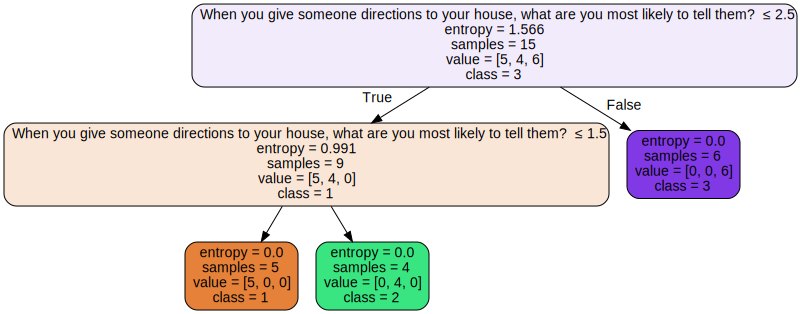

In [14]:
#http://scikit-learn.org/stable/modules/tree.html
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'

import graphviz 
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X, Y)

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

classNames =['1', '2', '3']
featureNames = ['Do you like online learning? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1, Depends = 2', 
              'How often do you procrastinate?', 
              'If you need help with homework/studying, what do you go to first? (Choose the number that corresponds best with your answer:)  Google/Internet = 0, Notes = 1, Textbook = 2, Friends/classmates = 3, Tutor = 4, Professor = 5, Family = 6', 
              'Do you use online study tools? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1', 
              'What kind of book would you like to read for fun? ', 
              'When you are not sure how to spell a word, what are you most likely to do?', 
              "You're out shopping for clothes, and you're waiting in line to pay. What are you most likely to do while you are waiting?", 
              'When you see the word "cat," what do you do first?', 
              "What's the best way for you to study for a test?", 
              "What's the best way for you to learn about how something works (like a computer or a video game)?", 
              'If you went to a school dance, what would you be most likely to remember the next day?', 
              'What do you find most distracting when you are trying to study?', 
              'When you are angry, what are you most likely to do? ', 
              'When you are happy, what are you most likely to do? ', 
              'When in a new place, how do you find your way around?', 
              'Of these three classes, which is your favorite? ', 
              'When you hear a song on the radio, what are you most likely to do?', 
              'What do you find most distracting when in class?', 
              'What do you like to do to relax?', 
              "What is the best way for you to remember a friend's phone number? ", 
              'If you won a game, which of these three prizes would you choose?', 
              'Which would you rather go to with a group of friends?', 
              'What are you most likely to remember about new people you meet?', 
              'When you give someone directions to your house, what are you most likely to tell them? ']

dot_data = tree.export_graphviz(clf, out_file=None, 
                         class_names=classNames,
                         feature_names=featureNames,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)

graph 

In [19]:
#Test cases (Manual)
testPredictions = []
test1 = clf.predict([[2,5,3,1,2,1,3,1,2,1,2,2,3,1,1,2,2,3,2,3,1,3,3,2,]])

test1 = list(test1)

testPredictions.append(test1)

print(testPredictions)

[[2]]


In [20]:
#Apply model on X_test
X_test = read_csv("Lets Get to Know You_ Student Profile (Responses).csv")
X_test

,Timestamp,Email Address,What is your first name?,What is your last name?,What is your age?,"Do you like online learning? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1, Depends = 2",How often do you procrastinate?,"If you need help with homework/studying, what do you go to first? (Choose the number that corresponds best with your answer:) Google/Internet = 0, Notes = 1, Textbook = 2, Friends/classmates = 3, Tutor = 4, Professor = 5, Family = 6","Do you use online study tools? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1",What kind of book would you like to read for fun?,...,"When in a new place, how do you find your way around?","Of these three classes, which is your favorite?","When you hear a song on the radio, what are you most likely to do?",What do you find most distracting when in class?,What do you like to do to relax?,What is the best way for you to remember a friend's phone number?,"If you won a game, which of these three prizes would you choose?",Which would you rather go to with a group of friends?,What are you most likely to remember about new people you meet?,"When you give someone directions to your house, what are you most likely to tell them?"
0,10/27/2021 12:23:17,NaN,Kim,Lam,21,2,3,0,1,3,...,1,3,2,3,2,3,3,3,1,1
1,10/28/2021 11:22:38,NaN,Adrian,Bahri,21,0,2,1,1,2,...,1,2,1,2,3,1,1,2,2,3
2,10/28/2021 11:25:36,NaN,Ellen,Forsgren,21,0,4,0,1,1,...,1,2,2,2,1,3,1,2,1,3
3,10/28/2021 11:30:02,NaN,Dylan,McCarroll,20,1,4,0,0,2,...,2,2,2,2,2,3,3,3,2,3
4,10/28/2021 11:33:42,NaN,Tanner,Foley,22,0,4,0,1,2,...,2,3,2,3,3,3,1,1,2,2
5,10/28/2021 12:16:53,NaN,Nathan,Buchanan,21,0,2,1,1,2,...,2,2,2,3,2,2,3,3,2,1
6,10/28/2021 13:52:33,NaN,Hunter,Vallad,21,1,4,0,1,2,...,3,2,3,3,1,3,1,3,2,2
7,10/28/2021 14:00:04,NaN,David,Pace,20,0,5,0,1,1,...,1,2,2,3,2,3,3,3,1,2
8,10/28/2021 14:03:09,NaN,Christopher,Enea,22,2,4,0,0,2,...,1,3,3,3,3,3,3,3,1,3
9,10/28/2021 14:03:21,NaN,Emilio,Arias,21,2,5,0,0,1,...,1,2,3,2,1,3,3,3,1,2


In [22]:
#Dropping columns not used in calculations
X_test.drop('Timestamp', inplace=True, axis=1) 
X_test.drop('Email Address', inplace=True, axis=1) 
X_test.drop('What is your first name?', inplace=True, axis=1) 
X_test.drop('What is your last name?', inplace=True, axis=1) 
X_test.drop('What is your age?', inplace=True, axis=1) 

In [23]:
X_test

,"Do you like online learning? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1, Depends = 2",How often do you procrastinate?,"If you need help with homework/studying, what do you go to first? (Choose the number that corresponds best with your answer:) Google/Internet = 0, Notes = 1, Textbook = 2, Friends/classmates = 3, Tutor = 4, Professor = 5, Family = 6","Do you use online study tools? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1",What kind of book would you like to read for fun?,"When you are not sure how to spell a word, what are you most likely to do?","You're out shopping for clothes, and you're waiting in line to pay. What are you most likely to do while you are waiting?","When you see the word ""cat,"" what do you do first?",What's the best way for you to study for a test?,What's the best way for you to learn about how something works (like a computer or a video game)?,...,"When in a new place, how do you find your way around?","Of these three classes, which is your favorite?","When you hear a song on the radio, what are you most likely to do?",What do you find most distracting when in class?,What do you like to do to relax?,What is the best way for you to remember a friend's phone number?,"If you won a game, which of these three prizes would you choose?",Which would you rather go to with a group of friends?,What are you most likely to remember about new people you meet?,"When you give someone directions to your house, what are you most likely to tell them?"
0,2,3,0,1,3,1,3,1,3,3,...,1,3,2,3,2,3,3,3,1,1
1,0,2,1,1,2,1,2,3,1,1,...,1,2,1,2,3,1,1,2,2,3
2,0,4,0,1,1,1,1,3,2,1,...,1,2,2,2,1,3,1,2,1,3
3,1,4,0,0,2,1,3,3,1,2,...,2,2,2,2,2,3,3,3,2,3
4,0,4,0,1,2,2,3,3,3,3,...,2,3,2,3,3,3,1,1,2,2
5,0,2,1,1,2,1,3,2,3,3,...,2,2,2,3,2,2,3,3,2,1
6,1,4,0,1,2,3,3,3,3,3,...,3,2,3,3,1,3,1,3,2,2
7,0,5,0,1,1,1,1,1,1,3,...,1,2,2,3,2,3,3,3,1,2
8,2,4,0,0,2,1,1,1,1,3,...,1,3,3,3,3,3,3,3,1,3
9,2,5,0,0,1,1,1,3,1,2,...,1,2,3,2,1,3,3,3,1,2


In [46]:
learnStyle = clf.predict(X_test)
print(learnStyle)
learnStyle = pd.DataFrame(learnStyle)
print(learnStyle)

[1 3 3 3 2 1 2 2 3 2 2 2 2 2 2 3 2 1 2 2 1]
    0
0   1
1   3
2   3
3   3
4   2
5   1
6   2
7   2
8   3
9   2
10  2
11  2
12  2
13  2
14  2
15  3
16  2
17  1
18  2
19  2
20  1


In [54]:
#Export predictions to output.csv
#https://datatofish.com/export-dataframe-to-csv/
import csv

# field names 
fields = ['LearningStylePredict'] 

# name of csv file 
filename = "output.csv"
    
# writing to csv file 
with open(filename, 'w', newline="") as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 

    # writing the fields 
    csvwriter.writerow(fields)
    
    learnStyle.to_csv(r'output.csv', index = False)


In [48]:
#Export predictions to output.csv
import csv

# field names 
fields = ['LearningStylePredict'] 
    
# data rows of csv file 
rows = learnStyle 
    
# name of csv file 
filename = "output.csv"
    
# writing to csv file 
with open(filename, 'w', newline="") as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 

    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(rows)

Error: iterable expected, not int